In [1]:
%matplotlib inline
import pyne
from decay_compare import *
from pyne import data
from pyne import rxname
import tables as tb

/home/scopatz/miniconda/lib/python3.6/importlib/_bootstrap.py:205: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/home/scopatz/miniconda/lib/python3.6/importlib/_bootstrap.py:205: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)


In [26]:
%%time
nucs = cram.NUCS
nucs = ['Co59M', 'Np240M', 'Np240', 'U236']
batemans, crammeds, diagexps = run_nuclides(nucs=nucs, verbose=True)

Running nuc Co59M
Running nuc Np240M
Running nuc Np240
Running nuc U236
CPU times: user 636 ms, sys: 4 ms, total: 640 ms
Wall time: 639 ms


In [27]:
NNUCS = len(crammeds)

In [28]:
b = np.zeros((NTIMES, NNUCS), dtype=float)
c = np.zeros((NTIMES, NNUCS), dtype=float)
d = np.zeros((NTIMES, NNUCS), dtype=float)
for n, nuc in enumerate(nucs):
    b[:, n] = batemans[nuc][nuc]
    c[:, n] = crammeds[nuc][nuc]
    d[:, n] = diagexps[nuc][nuc]

In [29]:
diagdiff = np.abs(d - c)
mu_diagdiff = diagdiff.mean(axis=1)
sigma_diagdiff = diagdiff.std(axis=1)

In [30]:
sigma_diagdiff

array([  0.000000000000000000e+00,   2.491671681567757128e-15,
         4.123081181970257143e-15,   3.786576719145419772e-15,
         4.056114391500013048e-15,   1.820729267361059151e-15,
         6.809947983623497790e-16,   2.857547999255292058e-15,
         2.492439904710977483e-15,   1.399184369998993207e-15,
         5.447939630242687535e-15,   1.660622319169067101e-15,
         1.665596572540080951e-15,   3.582488064476375346e-15,
         3.870297002690069670e-15,   1.506630285802571640e-15,
         2.019698787232584716e-15,   3.375657157113223697e-15,
         2.297830874370606881e-15,   1.410634917469007933e-15,
         4.446500722209033626e-15,   4.720891147561925848e-15,
         1.622232595432966368e-15,   3.155175510000462810e-15,
         1.753821534445852517e-15,   4.720857793047886737e-15,
         1.939476222516839421e-15,   1.451735906669038718e-15])

# Difference plot for all nuclides

The red line is the mean difference with $1\sigma$ error bars

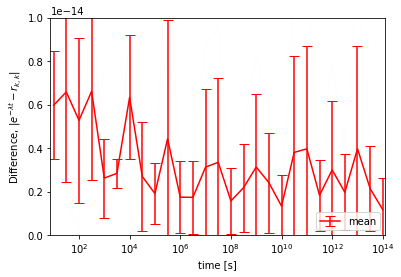

In [31]:
plt.plot(TIMES[1:], diagdiff[1:, :], color='gray', alpha=0.01)
plt.errorbar(TIMES[1:], mu_diagdiff[1:], yerr=sigma_diagdiff[1:], color='red', capsize=5, label='mean')
plt.axis([TIMES[1]*0.75, TIMES[-1]*1.25, 0.0, 1e-14])
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('time [s]')
plt.ylabel('Difference, $\\left|e^{-\\lambda t} - r_{k,k}\\right|$')
plt.legend(loc=0)

# Bateman Comparison

In [32]:
def bateman_diff_plot(nuc, batemans, crammeds):
    try:
        bateman = batemans[nuc]
        crammed = crammeds[nuc]
    except KeyError:
        print('Nuclide not in data!')
        return
    diff = diff_nuclide(bateman, crammed, abs=True)
    d = np.zeros((NTIMES, len(diff)), dtype=float)
    for i, (n, arr) in enumerate(diff.items()):
        if data.fpyield(nuc, n) > 0:
            print('skipping', n)
            continue
        plt.plot(TIMES, arr, label=n)
        d[:,i] = arr
    mu = d.mean(axis=1)
    sigma = d.std(axis=1)
    #plt.errorbar(TIMES, mu, yerr=sigma, capsize=5, color='black', label='mean')
    plt.xscale('log')
    #plt.yscale('log')
    #plt.axis([TIMES[1]*0.75, TIMES[-1]*1.25, 1e-18, 1e-6])
    plt.xlabel('time [s]')
    plt.ylabel('Difference, $\\left|e^{-\\lambda t} - r_{k,k}\\right|$')
    plt.legend(loc=0)

In [33]:
bateman_diff_plot('I131', batemans=batemans, crammeds=crammeds)

Nuclide not in data!


In [34]:
bateman_diff_plot('Sr90', batemans=batemans, crammeds=crammeds)

Nuclide not in data!


In [35]:
bateman_diff_plot('H3', batemans=batemans, crammeds=crammeds)

Nuclide not in data!


In [36]:
#bateman_diff_plot('U235', batemans=batemans, crammeds=crammeds)

In [37]:
bateman_diff_plot('Se86', batemans=batemans, crammeds=crammeds)

Nuclide not in data!


# Histogram of errors

In [38]:
diff_arrs = []
for nuc in nucs:
    diff = diff_nuclide(batemans[nuc], crammeds[nuc], abs=True, include_missing=False)
    diff_arr = np.empty((NTIMES, len(diff)), dtype=float)
    for i, (n, d) in enumerate(diff.items()):
        diff_arr[:,i] = d
        if d.max() >= 0.0001:
            print(nuc, '->', n)
    diff_arrs.append(diff_arr)
diff_arrs = np.concatenate(diff_arrs, axis=1)
diff_arrs.shape

Np240M -> Pu240
Np240M -> Th232
Np240 -> Th232
U236 -> Th232


(28, 165)

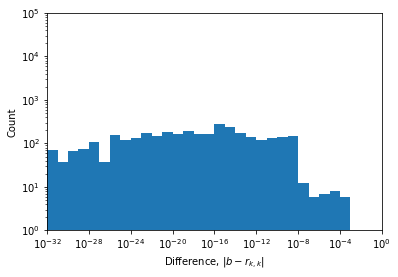

In [39]:
plt.hist(diff_arrs.flat, bins=np.logspace(-32, 0, 33), log=True)
plt.xscale('log')
plt.axis([1e-32, 1, 1e0, 1e5])
plt.xlabel('Difference, $\\left|b - r_{k,k}\\right|$')
plt.ylabel('Count')

In [40]:
(diff_arrs >= 0.999).sum()

0

U236

CRAM
 [  0.000000000000000000e+00   9.378526355947623535e-15
   2.965750438071329554e-14   9.378526355947249615e-14
   2.965750438070932347e-13   9.378526355943285368e-13
   2.965750438066968706e-12   9.378526355903628359e-12
   2.965750438027326560e-11   9.378526355507178786e-11
   2.965750437630847519e-10   9.378526351542504436e-10
   2.965750433666175392e-09   9.378526311895732713e-09
   2.965750394019424349e-08   9.378525915428214340e-08
   2.965749997551937607e-07   9.378521950754268731e-07
   2.965746032880939196e-06   9.378482304137546551e-06
   2.965706386559014467e-05   9.378085850240314603e-05
   2.965309962138799253e-04   9.374122537985005426e-04
   2.961349594974463199e-03   9.334611800316486296e-03
   2.922130771878156744e-02   8.951461401002600016e-02]
Bateman
 [  0.000000000000000000e+00   9.325873406851314940e-15
   2.964295475749168594e-14   9.370282327836324988e-14
   2.960964806675292998e-13   9.362510766663947125e-13
   2.960742762070368270e-12   9.36284383357

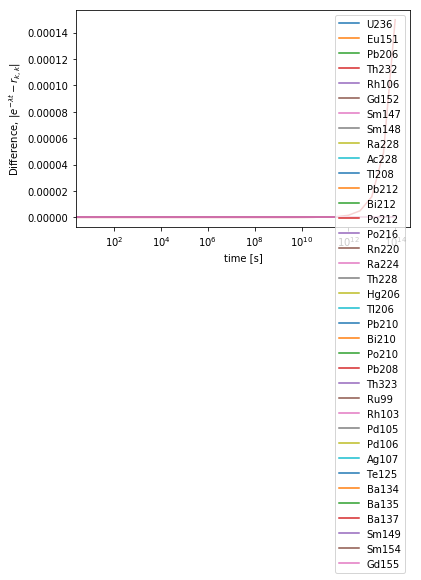

In [42]:
nuc = 'U236'
ouc = 'Th232'
print(nuc + '\n')
print('CRAM\n', crammeds[nuc][ouc])
print('Bateman\n', batemans[nuc][ouc])
print('Diff\n', batemans[nuc][ouc] - crammeds[nuc][ouc])
bateman_diff_plot(nuc, batemans=batemans, crammeds=crammeds)

In [43]:
data.decay_const('U236')

9.378526355947962e-16

In [44]:
data.all_children(nucname.id('U236'))

{360830000,
 420950000,
 430990000,
 440990000,
 441010000,
 441030000,
 441060000,
 451030000,
 451050000,
 451060000,
 461050000,
 461060000,
 461070000,
 461080000,
 471070000,
 471090000,
 481130000,
 491150000,
 511250000,
 521250000,
 521270000,
 531270000,
 531350000,
 541310000,
 541340000,
 541350000,
 541360000,
 551330000,
 551340000,
 551350000,
 551370000,
 561340000,
 561350000,
 561370000,
 601430000,
 601450000,
 611470000,
 611480000,
 611480001,
 611490000,
 621470000,
 621480000,
 621490000,
 621500000,
 621510000,
 621520000,
 621540000,
 631510000,
 631520000,
 631530000,
 631540000,
 631550000,
 641520000,
 641540000,
 641550000,
 641560000,
 641570000,
 641580000,
 661600000,
 661610000,
 661620000,
 661630000,
 661640000,
 671650000,
 681660000,
 681670000,
 802060000,
 812060000,
 812080000,
 822060000,
 822080000,
 822100000,
 822120000,
 832100000,
 832120000,
 842100000,
 842120000,
 842160000,
 862200000,
 882240000,
 882280000,
 892280000,
 902280000,
 902

In [46]:
data.branch_ratio(922360000, 902320000)

1.0

In [21]:
with tb.open_file(pyne.nuc_data) as f:
    ll = f.root.decay.level_list[:]

In [49]:
ll[ll['nuc_id'] == 922360000]

array([ (922360000,  1089,   7.390789920000000000e+14,  0.,   1.000000000000000000e+02, 0, b' '),
       (922360000, 36565,   7.390789920000000000e+14,  0.,   9.399999999999999469e-08, 0, b' '),
       (922360000,     0,   7.390789920000000000e+14,  0.,   0.000000000000000000e+00, 0, b' ')],
      dtype=[('nuc_id', '<i8'), ('rx_id', '<u4'), ('half_life', '<f8'), ('level', '<f8'), ('branch_ratio', '<f8'), ('metastable', '<i8'), ('special', 'S1')])

AttributeError: module 'pyne.rxname' has no attribute 'help'

In [ ]:
data.branch_ratio('Co58M', 'Co59M')

In [51]:
data.branch_ratio('Pu240', 'Xe131')

1.973169e-09